# Slower simulation

We have to understand the slower of the SoPa 2D Mot set-ups. Let's start out simple.

# Configuration by Lamporesi

We first have to simulate the fields in their design.

## Permanent magnet field

We start out with a permanent magnet. The field of such a permanent magnet with magnetization $\vec{m}$ is:
$$
\mathbf{B}(r) = \frac{\mu_0}{4\pi}\left(\frac{3\mathbf{r}(\mathbf{m}\cdot\mathbf{r})}{r^5} -\frac{\mathbf{m}}{r^3}\right)
$$
The stacks are always oriented in the $\pm\mathbf{e}_x$ direction. So we have:

$$
\mathbf{B}(\mathbf{r}) = \pm \frac{\mu_0}{4\pi}\frac{m}{r^3}\left(3\mathbf{r}\frac{x}{r^2}-\mathbf{e}_x\right)
$$

In other words we have:
\begin{eqnarray}
B_x(\mathbf{r}) = \pm \frac{\mu_0}{4\pi}\frac{m}{r^3}\left(3\frac{x^2}{r^2}-1\right)\\
B_y(\mathbf{r}) = \pm \frac{\mu_0}{4\pi}\frac{m}{r^3}\left(3\frac{xy}{r^2}\right)\\
B_z(\mathbf{r}) = \pm \frac{\mu_0}{4\pi}\frac{m}{r^3}\left(3\frac{xz}{r^2}\right)
\end{eqnarray}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.constants as sconst
from numpy import pi

mu0 = sconst.mu_0
%matplotlib inline

In [2]:
def magField(X,Z,m,X0,Y0,Z0):
    Xd = X - X0;
    Zd = Z - Z0;
    r = np.sqrt(Xd**2 +Y0**2+ Zd**2)

    Bx = mu0/4/pi*m/r**3*(3*(X-X0)**2/r**2-1);
    By = -mu0/4/pi*m/r**3*(3*(X-X0)*Y0/r**2);
    Bz = mu0/4/pi*m/r**3*(3*(X-X0)*(Z-Z0)/r**2);
    B = np.sqrt(Bx**2 + By**2 + Bz**2);
    
    return Bx, By, Bz, B

(-5, 5)

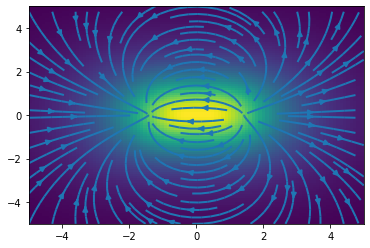

In [3]:
xmax = 5; Nx = 100;
zmax = 5; Nz = 100;
X0 = 0; Y0 = 2; Z0 = 0;m0=1;

xlin = np.linspace(-xmax, xmax, Nx);
zlin = np.linspace(-zmax, zmax, Nz);

X, Z = np.meshgrid(xlin,zlin);

Bx, By, Bz, B = magField(X, Z, m0, X0, Y0, Z0);

f, ax = plt.subplots()
ax.pcolor(xlin, zlin, B)
ax.streamplot(X,Z,Bx,Bz, linewidth=2)
ax.set_xlim(-xmax, xmax)
ax.set_ylim(-zmax, zmax)

## Lamporesi

Here we are basically simulating the magnetic field as described in the paper by Lamporesi et al.

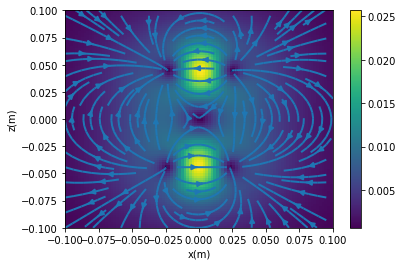

In [4]:
xmax = 100e-3; Nx = 100;
zmax = 100e-3; Nz = 100;
X0 = 0; Y0 = 0; Z0 = 0;m0=1;

xlin = np.linspace(-xmax, xmax, Nx);
zlin = np.linspace(-zmax, zmax, Nz);

X, Z = np.meshgrid(xlin,zlin);

zup = 43.5e-3;
zdown = -43.5e-3;
yleft = 32.5e-3;
yright = -32.5e-3;
xdist = 6e-3;
mSingle = 0.6;#Am^2

X1 = -xdist;Y1 =yleft; Z1 =zup; m1 = 4*mSingle;
X2 = xdist; Y2 =yleft; Z2 =zup; m2 = 5*mSingle;

X3 = -xdist;Y3 =yleft; Z3 =zdown; m3 = -5*mSingle;
X4 = xdist; Y4 =yleft; Z4 =zdown; m4 = -4*mSingle;

Bx1, By1, Bz1, B = magField(X, Z, m1, X1, Y1, Z1);
Bx2, By2, Bz2, B = magField(X, Z, m2, X2, Y2, Z2);

Bx3, By3, Bz3, B = magField(X, Z, m3, X3, Y3, Z3);
Bx4, By4, Bz4, B = magField(X, Z, m4, X4, Y4, Z4);

X5 = -xdist;Y5 =yright; Z5 =zup; m5 = 4*mSingle;
X6 = xdist; Y6 =yright; Z6 =zup; m6 = 5*mSingle;

X7 = -xdist;Y7 =yright; Z7 =zdown; m7 = -5*mSingle;
X8 = xdist; Y8 =yright; Z8 =zdown; m8 = -4*mSingle;

Bx5, By5, Bz5, B = magField(X, Z, m5, X5, Y5, Z5);
Bx6, By6, Bz6, B = magField(X, Z, m6, X6, Y6, Z6);

Bx7, By7, Bz7, B = magField(X, Z, m7, X7, Y7, Z7);
Bx8, By8, Bz8, B = magField(X, Z, m8, X8, Y8, Z8);

Bx = Bx1 + Bx2 + Bx3 + Bx4 + Bx5 + Bx6 + Bx7 + Bx8;
By = By1 + By2 + By3 + By4 + By5 + By6 + By7 + By8;
Bz = Bz1 + Bz2 + Bz3 + Bz4 + Bz5 + Bz6 + Bz7 + Bz8;

B = np.sqrt(Bx**2 + By**2 + Bz**2);

f, ax = plt.subplots()
p = ax.pcolor(xlin, zlin, B)
ax.streamplot(X,Z,Bx,Bz, linewidth=2)
ax.set_xlim(-xmax, xmax)
ax.set_ylim(-zmax, zmax)
ax.set_xlabel('x(m)')
ax.set_ylabel('z(m)')
f.colorbar(p)
plt.savefig('lamporesi2DFields.pdf', bbox ='tight')

(-0.15, 0.15)

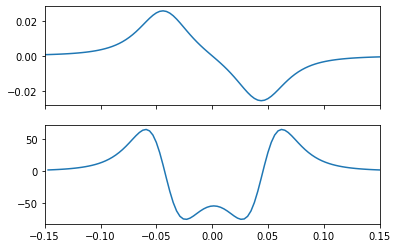

In [5]:
zmax = 150e-3; Nz = 100;
xpos = 0;#where do we position the slower.
zlin = np.linspace(-zmax, zmax, Nz);

zup = 43.5e-3;
zdown = -43.5e-3;
yleft = 32.5e-3;
yright = -32.5e-3;
xdist = 6e-3;
mSingle = 0.6;#Am^2

X1 = -xdist;Y1 =yleft; Z1 =zup; m1 = 4*mSingle;
X2 = xdist; Y2 =yleft; Z2 =zup; m2 = 5*mSingle;

X3 = -xdist;Y3 =yleft; Z3 =zdown; m3 = -5*mSingle;
X4 = xdist; Y4 =yleft; Z4 =zdown; m4 = -4*mSingle;

Bx1, By1, Bz1, B = magField(0, zlin, m1, X1, Y1, Z1);
Bx2, By2, Bz2, B = magField(xpos, zlin, m2, X2, Y2, Z2);

Bx3, By3, Bz3, B = magField(xpos, zlin, m3, X3, Y3, Z3);
Bx4, By4, Bz4, B = magField(xpos, zlin, m4, X4, Y4, Z4);

X5 = -xdist;Y5 =yright; Z5 =zup; m5 = 4*mSingle;
X6 = xdist; Y6 =yright; Z6 =zup; m6 = 5*mSingle;

X7 = -xdist;Y7 =yright; Z7 =zdown; m7 = -5*mSingle;
X8 = xdist; Y8 =yright; Z8 =zdown; m8 = -4*mSingle;

Bx5, By5, Bz5, B = magField(xpos, zlin, m5, X5, Y5, Z5);
Bx6, By6, Bz6, B = magField(xpos, zlin, m6, X6, Y6, Z6);

Bx7, By7, Bz7, B = magField(xpos, zlin, m7, X7, Y7, Z7);
Bx8, By8, Bz8, B = magField(xpos, zlin, m8, X8, Y8, Z8);

Bx = Bx1 + Bx2 + Bx3 + Bx4 + Bx5 + Bx6 + Bx7 + Bx8;
By = By1 + By2 + By3 + By4 + By5 + By6 + By7 + By8;
Bz = Bz1 + Bz2 + Bz3 + Bz4 + Bz5 + Bz6 + Bz7 + Bz8;

B = np.sqrt(Bx**2 + By**2 + Bz**2);
dz = zlin[1]-zlin[0]
Bgrad = np.diff(Bx)/dz
f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(zlin, Bx);
ax2.plot(zlin[1:], Bgrad*1e2);
ax2.set_xlim(-zmax, zmax)

So in the 2D Mot the people there have a gradient of something like 50G/cm. This is actually substantially higher than people typically do for K40, where the gradients are only in the order of 20G/cm.

# Zeeman slowing

Now that we have the magnetic field along the z-axis, so we can also calculate the slowing. We will start out with the traditional Zeeman slower as we have it on the the NaLi and then compare its performance to the one by Lamporesi et al.

In [6]:
import scipy.stats as sst
import scipy.integrate as spi

kB = 1.38e-23
hbar = 1e-34
uMass = 1.66e-27
muB = 9.27e-24

mNa = 23*uMass
lambNa = 589e-9

GammaNa = 2*pi*10*1e6

## Zeeman slower a la NaLi

We will here reproduce the results of the Master thesis by Jan Krieger. The will allow us to benchmark the situation.

In [7]:
#TNa = 210+273;# temperature of sodium coming out of the oven
TNa = 700;

gGrav = 9.81;

#parameters
Gamma = GammaNa; kL = 2*pi/lambNa;mass = mNa;


mgNa = 1/2
meNa = 3/2
geNa = 4/3
ggNa = 2.002

#slower
s0 = 2
B0 = 800e-4;
Boff = -214e-4;
l = .72
d0 = -2*pi*350e6;

The functions for the slowing.

In [8]:
def magFieldofSlower(zlin, length = .72, B0 = 1e-5, Boff = 0):
    '''
    B0   ... Amplitude of the slower field
    Boff ... Remaining magnetic field at the end of the slower
    '''
    #if zlin<length:
    mask = (zlin<length);
    Bx = B0*np.sqrt((1-zlin/length)*mask)+Boff
    #else:
    #    Bx = 0
    return Bx*mask

def deriv2(y,t,d0):
    x = y[0]
    v = y[1]
    Bx = magFieldofSlower(x, l, B0, Boff)
    deltax = d0 + np.abs(kL*v)-muB/hbar*dm*Bx
    Fx = -hbar*kL/mass*Gamma/2*s0/(1+s0+(2*deltax/Gamma)**2)
    return np.array([ y[1], Fx])


### Characterization

plot up the field of the slower

Text(0, 0.5, 'mag field (G)')

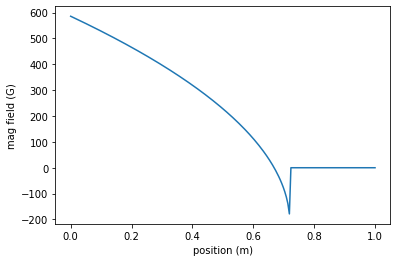

In [9]:
Nx = 200;
xlin = np.linspace(0, 1, Nx);
Bnali = np.zeros(Nx)
for ii,x in enumerate(xlin):
    Bnali[ii] = magFieldofSlower(x, l, B0, Boff)

f, ax = plt.subplots()
ax.plot(xlin, Bnali*1e4)
ax.set_xlabel('position (m)')
ax.set_ylabel('mag field (G)')

what is the expected maxmimum slowing velocity ?

In [10]:
dm = (meNa*geNa-mgNa*ggNa)
vslowed = abs((d0 - muB/hbar*dm*(B0+Boff))/kL)
print(vslowed)

714.8693590753413


test the slowing of different velocities

In [11]:
velos = np.linspace(100, 700, 7);Nv = 7
tmax = 10e-3;Nt = 200;

dm = (meNa*geNa-mgNa*ggNa)

time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nv))
ps = np.zeros((Nt,Nv))
deltax = np.zeros((Nt,Nv))
scatter = np.zeros((Nt,Nv))
vt =np.zeros((Nt,Nv))

for jj in np.arange(Nv):
    v0 = velos[jj]
    xinit = np.array([0, v0])  # initial values
    x = spi.odeint(deriv2,xinit,time,args = (d0,))
    
    s_xt = x[:,0];
    s_vt = x[:,1];
    Bt = magFieldofSlower(s_xt, l, B0, Boff);
    deltat = d0 + kL*s_vt-muB/hbar*dm*Bt;
    scatter[:,jj] = Gamma/2*s0/(1+s0+(2*deltat/Gamma)**2)
    deltax[:,jj] = deltat;
    xt[:,jj] = s_xt;
    vt[:,jj] = s_vt;

a summary

Text(0.5, 0, 'position (m)')

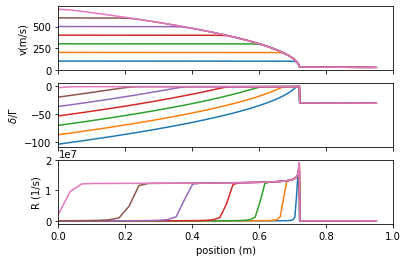

In [12]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, sharex = True)
ax1.plot(xt, vt)
ax2.plot(xt, deltax/Gamma)
ax3.plot(xt, scatter)
ax1.set_xlim(0,1)
ax1.set_ylabel('v(m/s)')
ax2.set_ylabel('$\delta/\Gamma$')
ax3.set_ylabel('R (1/s)')
ax3.set_xlabel('position (m)')

### Full simulation

Slowing of the full velocity distribution

C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


Text(0.5, 0, 'velocity (m/s)')

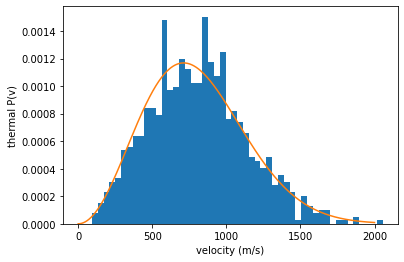

In [13]:
Nv = int(1e3)
Nbins = 50
vmax = 2000
vlin = np.linspace(0,vmax,Nv)

vth_Na = np.sqrt(kB*TNa/mNa)

vrNa = sst.maxwell.rvs(scale = vth_Na, size = Nv)
fvNa = np.sqrt(mNa/(2*pi*kB*TNa)**3)*4*pi*vlin**2*np.exp(-mNa*vlin**2/2/kB/TNa)
fvNa = fvNa/np.trapz(fvNa,vlin)

plt.hist(vrNa,bins = Nbins,normed=True, histtype='stepfilled')
plt.plot(vlin, fvNa)
plt.ylabel('thermal P(v)')
plt.xlabel('velocity (m/s)')

In [14]:
dm = (meNa*geNa-mgNa*ggNa)

Nt = 200

time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nv))
ps = np.zeros((Nt,Nv))
deltax = np.zeros((Nt,Nv))
scatter = np.zeros((Nt,Nv))
vt =np.zeros((Nt,Nv))

for jj in np.arange(Nv):
    v0 = vrNa[jj]
    xinit = np.array([0, v0])  # initial values
    x = spi.odeint(deriv2,xinit,time,args = (d0,))

    xt[:,jj] = x[:,0];
    vt[:,jj] = x[:,1];


C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


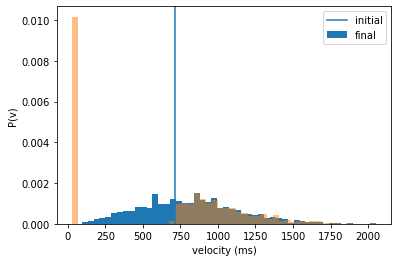

In [15]:
vfinal = vt[-1,:]

plt.hist(vrNa,normed=True, histtype='stepfilled',bins = Nbins);
plt.hist(vfinal,normed=True, histtype='stepfilled',bins = Nbins, alpha = 0.5);
plt.axvline(vslowed)
plt.xlabel('velocity (ms)')
plt.ylabel('P(v)')
plt.legend(['initial', 'final'])
plt.savefig('slowedSodium.pdf', bbox = 'tight')

## The lamporesi slower

Let us now try to understand how the slower by Lamporesi et al works.

In [16]:
TNa = 210+273;# temperature of sodium coming out of the oven

gGrav = 9.81;

#parameters
Gamma = GammaNa; kL = 2*pi/lambNa;mass = mNa;

tmax = 10e-3

mgNa = 1/2
meNa = 3/2
geNa = 4/3
ggNa = 2.002

#slower
x0 = -126e-3;
xSlowerEnd = -18e-3;
d0 = -2*pi*304e6;
s0 = 2;
mSingle = -0.6;#Am^2
Nmagnets = 8.;
xdist = 6e-3;

In [17]:
def magFieldofX(zlin):
    xpos = 0;
    zup = 43.5e-3;zdown = -43.5e-3;
    yleft = 32.5e-3;yright = -32.5e-3;

    X1 = -xdist;Y1 =yleft; Z1 =zup; m1 = Nmagnets/2.*mSingle;
    X2 = xdist; Y2 =yleft; Z2 =zup; m2 = Nmagnets/2.*mSingle;

    X3 = -xdist;Y3 =yleft; Z3 =zdown; m3 = -Nmagnets/2.*mSingle;
    X4 = xdist; Y4 =yleft; Z4 =zdown; m4 = -Nmagnets/2.*mSingle;

    X5 = -xdist;Y5 =yright; Z5 =zup; m5 = Nmagnets/2.*mSingle;
    X6 = xdist; Y6 =yright; Z6 =zup; m6 = Nmagnets/2.*mSingle;
    
    X7 = -xdist;Y7 =yright; Z7 =zdown; m7 = -Nmagnets/2.*mSingle;
    X8 = xdist; Y8 =yright; Z8 =zdown; m8 = -Nmagnets/2.*mSingle;

    Bx1, By1, Bz1, B = magField(xpos, zlin, m1, X1, Y1, Z1);
    Bx2, By2, Bz2, B = magField(xpos, zlin, m2, X2, Y2, Z2);

    Bx3, By3, Bz3, B = magField(xpos, zlin, m3, X3, Y3, Z3);
    Bx4, By4, Bz4, B = magField(xpos, zlin, m4, X4, Y4, Z4);

    Bx5, By5, Bz5, B = magField(xpos, zlin, m5, X5, Y5, Z5);
    Bx6, By6, Bz6, B = magField(xpos, zlin, m6, X6, Y6, Z6);

    Bx7, By7, Bz7, B = magField(xpos, zlin, m7, X7, Y7, Z7);
    Bx8, By8, Bz8, B = magField(xpos, zlin, m8, X8, Y8, Z8);

    Bx = Bx1 + Bx2 + Bx3 + Bx4 + Bx5 + Bx6 + Bx7 + Bx8;
    By = By1 + By2 + By3 + By4 + By5 + By6 + By7 + By8;
    Bz = Bz1 + Bz2 + Bz3 + Bz4 + Bz5 + Bz6 + Bz7 + Bz8;

    B = np.sqrt(Bx**2 + By**2 + Bz**2);
    return Bx


In [18]:
def MagSlowerLamporesi(x):
    Bx = magFieldofX(x)*(x<xSlowerEnd)
    return Bx

def derivLamporesi(y,t,d0):
    '''
    We will suppose that we have Zeeman slowing up to the point, where we enter the MOT region.
    In their paper this is basically reached if x >-18mm.
    '''
    x = y[0]
    v = y[1]
    Bx = MagSlowerLamporesi(x)
    deltax = d0 + np.abs(kL*v)-muB/hbar*dm*Bx
    if x > xSlowerEnd:
        Fx = 0;
    else:
        Fx = -hbar*kL/mass*Gamma/2*s0/(1+s0+(2*deltax/Gamma)**2)
    return np.array([ y[1], Fx])

### Characterization of the slower

let me compare it to our NaLi slower.

(-0.2, 0)

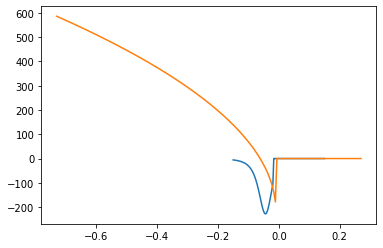

In [19]:
zmax = 150e-3; Nz = 100;
xpos = 0;#where do we position the slower.
zlin = np.linspace(-zmax, zmax, Nz);

B = MagSlowerLamporesi(zlin)
dz = zlin[1]-zlin[0]
Bgrad = np.diff(B)/dz
f, ax1 = plt.subplots()
ax1.plot(zlin, B*1e4);
ax1.plot(xlin-0.73, Bnali*1e4)
ax.set_xlabel('position (m)')
ax.set_ylabel('mag field (G)')
ax.set_xlim(-0.2,0)

what is the expected maxmimum slowing velocity ?

In [20]:
dm = (meNa*geNa-mgNa*ggNa)
Bmax = B.max()
vslowed = abs((d0 - muB/hbar*dm*(Bmax))/kL)
print(vslowed)

179.05599999999998


now the different velocities

In [21]:
Nvtest = 21;
vlin = np.linspace(25,225, Nvtest);
print(vlin)
dm = (meNa*geNa-mgNa*ggNa)

Nt = 200;
tmax = 5e-3;
time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nvtest))
ps = np.zeros((Nt,Nvtest))
deltax = np.zeros((Nt,Nvtest))
scatter = np.zeros((Nt,Nvtest))
vt =np.zeros((Nt,Nvtest))

for jj in np.arange(Nvtest):
    v0 = vlin[jj]
    xinit = np.array([x0, v0])  # initial values
    x = spi.odeint(derivLamporesi,xinit,time,args = (d0,))
    
    s_xt = x[:,0];
    s_vt = x[:,1];
    Bt = MagSlowerLamporesi(s_xt);
    deltat = d0 + kL*s_vt-muB/hbar*dm*Bt;
    scatter[:,jj] = Gamma/2*s0/(1+s0+(2*deltat/Gamma)**2)
    deltax[:,jj] = deltat;

    xt[:,jj] = x[:,0];
    vt[:,jj] = x[:,1];

[ 25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135. 145. 155.
 165. 175. 185. 195. 205. 215. 225.]


(-0.126, 0)

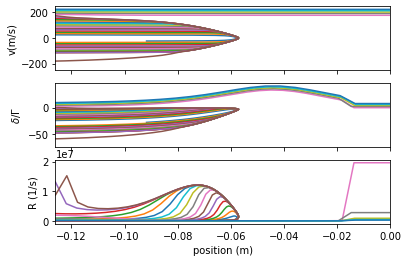

In [22]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, sharex = True)
ax1.plot(xt, vt)
ax2.plot(xt, deltax/Gamma)
ax3.plot(xt, scatter)
ax1.set_ylabel('v(m/s)')
ax2.set_ylabel('$\delta/\Gamma$')
ax3.set_ylabel('R (1/s)')
ax3.set_xlabel('position (m)')
ax1.set_xlim(x0,0)


and another summary, where is quite similir to the inset of the paper.

(0, 225)

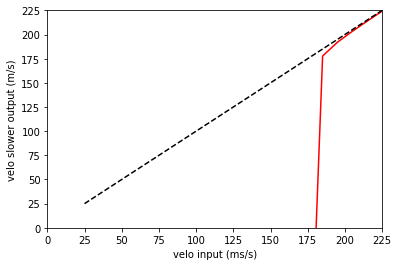

In [23]:
f, ax = plt.subplots()
ax.plot(vlin, vt[-1], 'r-')
ax.plot(vlin, vlin, 'k--')

ax.set_xlabel('velo input (ms/s)')
ax.set_ylabel('velo slower output (m/s)')
ax.set_xlim(0,225)
ax.set_ylim(0,225)

### Full simulation

C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


Text(0.5, 0, 'velocity (m/s)')

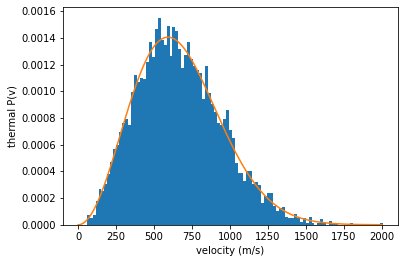

In [24]:
Nv = int(5e3)
Nbins = 100
vmax = 2000
vlin = np.linspace(0,vmax,Nv)

vth_Na = np.sqrt(kB*TNa/mNa)

vrNa = sst.maxwell.rvs(scale = vth_Na, size = Nv)
fvNa = np.sqrt(mNa/(2*pi*kB*TNa)**3)*4*pi*vlin**2*np.exp(-mNa*vlin**2/2/kB/TNa)
fvNa = fvNa/np.trapz(fvNa,vlin)

plt.hist(vrNa,bins = Nbins,normed=True, histtype='stepfilled')
plt.plot(vlin, fvNa)
plt.ylabel('thermal P(v)')
plt.xlabel('velocity (m/s)')

For the full distribution

In [25]:
dm = (meNa*geNa-mgNa*ggNa)

Nt = 200
tmax = 1e-3
time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nv))
ps = np.zeros((Nt,Nv))
deltax = np.zeros((Nt,Nv))
scatter = np.zeros((Nt,Nv))
vt =np.zeros((Nt,Nv))

for jj in np.arange(Nv):
    v0 = vrNa[jj]
    xinit = np.array([x0, v0])  # initial values
    x = spi.odeint(derivLamporesi,xinit,time,args = (d0,))

    xt[:,jj] = x[:,0];
    vt[:,jj] = x[:,1];

C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


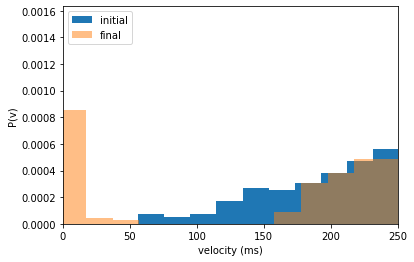

In [26]:
vfinal = vt[-1,:]

f, ax = plt.subplots()
ax.hist(vrNa,normed=True, histtype='stepfilled',bins = Nbins);
ax.hist(vfinal,normed=True, histtype='stepfilled',bins = Nbins, alpha = 0.5);
#ax.plot(vlin, fvNa)
ax.set_xlabel('velocity (ms)')
ax.set_ylabel('P(v)')
ax.set_xlim(0,250)
ax.legend(['initial', 'final'])
plt.savefig('slowedLamporesi.pdf', bbox = 'tight')

## MOT capture

now we also have to test if we can actually capture atoms in the MOT. We follow the calculations in the master thesis by Donadello.

In [27]:
d0 = -2*pi*11e6;
s0 = 2;
motSize = 18e-3;
x0 = -motSize;

# mag field configuration
mSingle = -0.6;#Am^2
Nmagnets = 8.;

In [28]:
def MagMotLamporesi(x):
    Bx = magFieldofX(x)*(abs(x)<motSize)
    return Bx

def derivMOT(y,t,d0):
    '''
    We would like to estimate the capture velocity of the atoms in the MOT with the force coming from two sites.
    '''
    x = y[0]
    v = y[1]
    Bx = MagMotLamporesi(x)
    delta1 = d0 + 1/np.sqrt(2)*np.abs(kL*v)+muB/hbar*dm*Bx
    delta2 = d0 - 1/np.sqrt(2)*np.abs(kL*v)-muB/hbar*dm*Bx
    if abs(x) > motSize:
        Fx = 0;
    else:
        Fx = np.sqrt(2)*hbar*kL/mass*Gamma/2*(-s0/(1+s0+(2*delta1/Gamma)**2)+s0/(1+s0+(2*delta2/Gamma)**2))
    return np.array([ y[1], Fx])

what is the magnetic field here ?

(-0.2, 0)

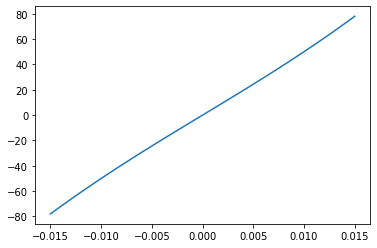

In [29]:
zmax = 15e-3; Nz = 100;
xpos = 0;#where do we position the slower.
zlin = np.linspace(-zmax, zmax, Nz);

B = MagMotLamporesi(zlin)
dz = zlin[1]-zlin[0]
Bgrad = np.diff(B)/dz
f, ax1 = plt.subplots()
ax1.plot(zlin, B*1e4);
ax.set_xlabel('position (m)')
ax.set_ylabel('mag field (G)')
ax.set_xlim(-0.2,0)

In [30]:
Nvtest = 20;
vlin = np.linspace(5,100, Nvtest);
print(vlin)
dm = (meNa*geNa-mgNa*ggNa)

Nt = 100;
tmax = 2e-3;
time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nvtest))
ps = np.zeros((Nt,Nvtest))
deltax = np.zeros((Nt,Nvtest))
scatter = np.zeros((Nt,Nvtest))
vt =np.zeros((Nt,Nvtest))

for jj in np.arange(Nvtest):
    v0 = vlin[jj]
    xinit = np.array([x0, v0])  # initial values
    x = spi.odeint(derivMOT,xinit,time,args = (d0,))
    
    s_xt = x[:,0];
    s_vt = x[:,1];
    Bt = MagMotLamporesi(s_xt);
    deltat = d0 + kL*s_vt-muB/hbar*dm*Bt;
    scatter[:,jj] = Gamma/2*s0/(1+s0+(2*deltat/Gamma)**2)
    deltax[:,jj] = deltat;

    xt[:,jj] = x[:,0];
    vt[:,jj] = x[:,1];

[  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100.]


(-0.018, 0.018)

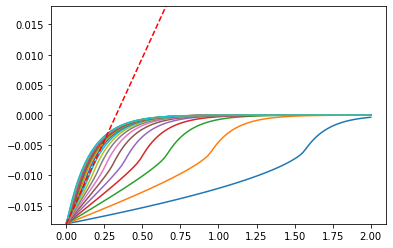

In [31]:
xsep = time*55+x0;
f, ax = plt.subplots()
ax.plot(time*1e3, xt);
ax.plot(time*1e3, xsep, 'r--');
ax.set_ylim(-motSize,motSize)

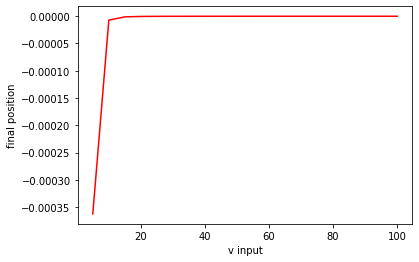

In [32]:
f, ax = plt.subplots()
ax.plot(vlin, xt[-1],'r-')
ax.set_ylabel('final position')
ax.set_xlabel('v input')

plt.savefig('captureNa.pdf', bbox = 'tight')

# K Slower

now that we have simulated the slower for Sodium, we should do the same K. let's see

In [33]:
import scipy.stats as sst
import scipy.integrate as spi

kB = 1.38e-23
hbar = 1e-34
uMass = 1.66e-27
muB = 9.27e-24

mK = 40*uMass
lambK = 767e-9
GammaK = 2*pi*6*1e6

TK = 100+273;# temperature of sodium coming out of the oven

#parameters
Gamma = GammaK; kL = 2*pi/lambK;mass = mK;

s0 = 2
tmax = 10e-3

mgNa = 1/2
meNa = 3/2
geNa = 4/3
ggNa = 2.002

#slower
x0 = -126e-3;
d0 = -2*pi*180e6;
s0 = 2;
mSingle = -0.6;#Am^2
Nmagnets = 3.;
xdist = 3e-3;

(-0.15, 0.15)

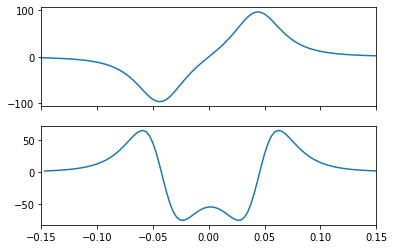

In [34]:
zmax = 150e-3; Nz = 100;
xpos = 0;#where do we position the slower.
zlin = np.linspace(-zmax, zmax, Nz);

B = magFieldofX(zlin)
dz = zlin[1]-zlin[0]
Bgrad = np.diff(Bx)/dz
f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(zlin, B*1e4);
ax2.plot(zlin[1:], Bgrad*1e2);
ax2.set_xlim(-zmax, zmax)

## Characterization of the slower

what is the expected maxmimum slowing velocity ?

In [35]:
dm = (meNa*geNa-mgNa*ggNa)
Bmax = B.max()
vslowed = abs((d0 - muB/hbar*dm*(Bmax))/kL)
print(vslowed)

247.12633480199898


now the different velocities

In [36]:
Nvtest = 11;
vlin = np.linspace(25,225, Nvtest);
print(vlin)
dm = (meNa*geNa-mgNa*ggNa)

Nt = 200;
tmax = 2e-3;
time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nvtest))
ps = np.zeros((Nt,Nvtest))
deltax = np.zeros((Nt,Nvtest))
scatter = np.zeros((Nt,Nvtest))
vt =np.zeros((Nt,Nvtest))

for jj in np.arange(Nvtest):
    v0 = vlin[jj]
    xinit = np.array([x0, v0])  # initial values
    x = spi.odeint(derivLamporesi,xinit,time,args = (d0,))
    
    s_xt = x[:,0];
    s_vt = x[:,1];
    Bt = MagSlowerLamporesi(s_xt);
    deltat = d0 + kL*s_vt-muB/hbar*dm*Bt;
    scatter[:,jj] = Gamma/2*s0/(1+s0+(2*deltat/Gamma)**2)
    deltax[:,jj] = deltat;

    xt[:,jj] = x[:,0];
    vt[:,jj] = x[:,1];

[ 25.  45.  65.  85. 105. 125. 145. 165. 185. 205. 225.]


(-0.126, 0)

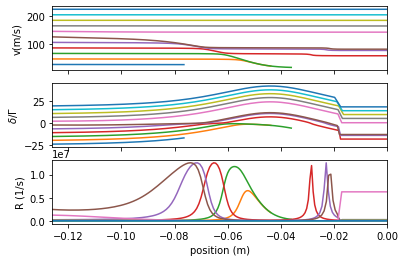

In [37]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, sharex = True)
ax1.plot(xt, vt)
ax2.plot(xt, deltax/Gamma)
ax3.plot(xt, scatter)
ax1.set_ylabel('v(m/s)')
ax2.set_ylabel('$\delta/\Gamma$')
ax3.set_ylabel('R (1/s)')
ax3.set_xlabel('position (m)')
ax1.set_xlim(x0,0)


and another summary, where is quite similir to the inset of the paper.

(0, 225)

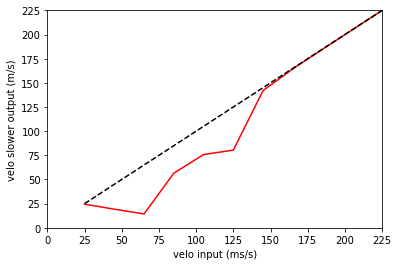

In [38]:
f, ax = plt.subplots()
ax.plot(vlin, vt[-1], 'r-')
ax.plot(vlin, vlin, 'k--')

ax.set_xlabel('velo input (ms/s)')
ax.set_ylabel('velo slower output (m/s)')
ax.set_xlim(0,225)
ax.set_ylim(0,225)

## Full simulation

C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


Text(0.5, 0, 'velocity (m/s)')

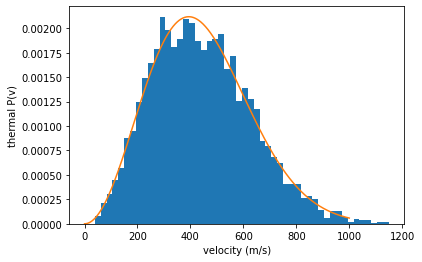

In [39]:
Nv = int(5e3)
Nbins = 50
vmax = 1000
vlin = np.linspace(0,vmax,Nv)

vth = np.sqrt(kB*TK/mK)

vr = sst.maxwell.rvs(scale = vth, size = Nv)
fv = np.sqrt(mNa/(2*pi*kB*TK)**3)*4*pi*vlin**2*np.exp(-mK*vlin**2/2/kB/TK)
fv = fv/np.trapz(fv,vlin)

plt.hist(vr,bins = Nbins,normed=True, histtype='stepfilled')
plt.plot(vlin, fv)
plt.ylabel('thermal P(v)')
plt.xlabel('velocity (m/s)')

In [40]:
dm = (meNa*geNa-mgNa*ggNa)

Nt = 100
tmax = 10e-3
time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nv))
ps = np.zeros((Nt,Nv))
deltax = np.zeros((Nt,Nv))
scatter = np.zeros((Nt,Nv))
vt =np.zeros((Nt,Nv))

for jj in np.arange(Nv):
    v0 = vr[jj]
    xinit = np.array([x0, v0])  # initial values
    x = spi.odeint(derivLamporesi,xinit,time,args = (d0,))

    xt[:,jj] = x[:,0];
    vt[:,jj] = x[:,1];

C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


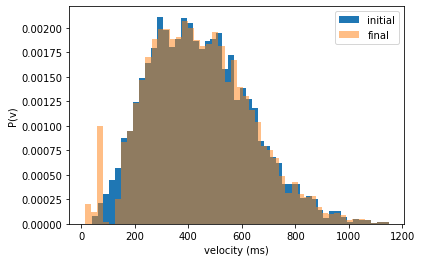

In [41]:
vfinal = vt[-1,:]

plt.hist(vr,normed=True, histtype='stepfilled',bins = Nbins);
plt.hist(vfinal,normed=True, histtype='stepfilled',bins = Nbins, alpha = 0.5);
plt.xlabel('velocity (ms)')
plt.ylabel('P(v)')
plt.legend(['initial', 'final'])
plt.savefig('slowedPotassium.pdf', bbox = 'tight')

## MOT capture

now we also have to test if we can actually capture atoms in the MOT. We follow the calculations in the master thesis by Donadello.

In [42]:
d0 = -2*pi*11e6;
s0 = 2;
motSize = 18e-3;
x0 = -motSize;

# mag field configuration
mSingle = -0.6;#Am^2
Nmagnets = 3.;

In [43]:
def MagMotLamporesi(x):
    Bx = magFieldofX(x)*(abs(x)<motSize)
    return Bx

def derivMOT(y,t,d0):
    '''
    We would like to estimate the capture velocity of the atoms in the MOT with the force coming from two sites.
    '''
    x = y[0]
    v = y[1]
    Bx = MagMotLamporesi(x)
    delta1 = d0 + 1/np.sqrt(2)*np.abs(kL*v)+muB/hbar*dm*Bx
    delta2 = d0 - 1/np.sqrt(2)*np.abs(kL*v)-muB/hbar*dm*Bx
    if abs(x) > motSize:
        Fx = 0;
    else:
        Fx = np.sqrt(2)*hbar*kL/mass*Gamma/2*(-s0/(1+s0+(2*delta1/Gamma)**2)+s0/(1+s0+(2*delta2/Gamma)**2))
    return np.array([ y[1], Fx])

what is the magnetic field here ?

(-0.2, 0)

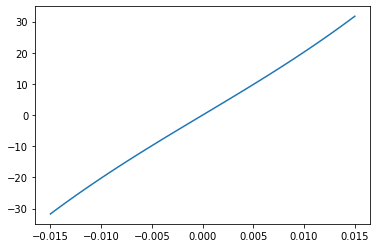

In [44]:
zmax = 15e-3; Nz = 100;
xpos = 0;#where do we position the slower.
zlin = np.linspace(-zmax, zmax, Nz);

B = MagMotLamporesi(zlin)
dz = zlin[1]-zlin[0]
Bgrad = np.diff(B)/dz
f, ax1 = plt.subplots()
ax1.plot(zlin, B*1e4);
ax.set_xlabel('position (m)')
ax.set_ylabel('mag field (G)')
ax.set_xlim(-0.2,0)

In [45]:
Nvtest = 20;
vlin = np.linspace(5,100, Nvtest);
print(vlin)
dm = (meNa*geNa-mgNa*ggNa)

Nt = 100;
tmax = 2e-3;
time = np.linspace(0.0,tmax,Nt)
xt = np.zeros((Nt,Nvtest))
ps = np.zeros((Nt,Nvtest))
deltax = np.zeros((Nt,Nvtest))
scatter = np.zeros((Nt,Nvtest))
vt =np.zeros((Nt,Nvtest))

for jj in np.arange(Nvtest):
    v0 = vlin[jj]
    xinit = np.array([x0, v0])  # initial values
    x = spi.odeint(derivMOT,xinit,time,args = (d0,))
    
    s_xt = x[:,0];
    s_vt = x[:,1];
    Bt = MagMotLamporesi(s_xt);
    deltat = d0 + kL*s_vt-muB/hbar*dm*Bt;
    scatter[:,jj] = Gamma/2*s0/(1+s0+(2*deltat/Gamma)**2)
    deltax[:,jj] = deltat;

    xt[:,jj] = x[:,0];
    vt[:,jj] = x[:,1];

[  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100.]


(-0.018, 0.018)

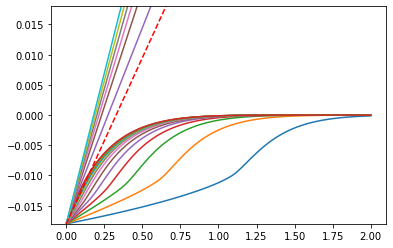

In [46]:
xsep = time*55+x0;
f, ax = plt.subplots()
ax.plot(time*1e3, xt);
ax.plot(time*1e3, xsep, 'r--');
ax.set_ylim(-motSize,motSize)

the capture velocity is also in the order of a few 50 ms/s

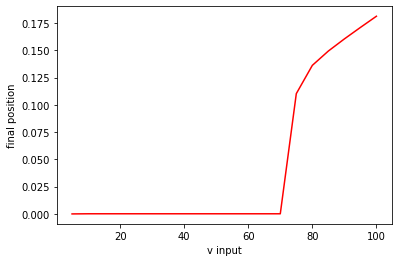

In [47]:
f, ax = plt.subplots()
ax.plot(vlin, xt[-1],'r-')
ax.set_ylabel('final position')
ax.set_xlabel('v input')

plt.savefig('capturePotassium.pdf', bbox = 'tight')